In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import bs4
from bs4 import BeautifulSoup
import requests

# Methode um die CSV dateien zu bereinigen

```python
import os

dir_pfad = './Daten-nach-nationalen-Parteien'

for datei_name in os.listdir(dir_pfad):
    datei_pfad = os.path.join(dir_pfad, datei_name)
    
    if os.path.isfile(datei_pfad):
        with open(datei_pfad, 'r', encoding='latin-1') as file:
            inhalt = file.read()
        
        inhalt = inhalt.replace(';', ',')
        
        with open(datei_pfad, 'w', encoding='latin-1') as file:
            file.write(inhalt)
```


In [2]:

pfad = './Daten-nach-nationalen-Parteien/Europawahlen-DE-'
jahre = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024]

eu_wahlen = {}

for jahr in jahre:
    dateipfad = f"{pfad}{jahr}.csv"
    eu_wahlen[jahr] = pd.read_csv(dateipfad)

eu_wahlen[2019]

,PARTY_ID,TYPE,SEATS_TOTAL,GROUP_ID,UPDATE_STATUS,UPDATE_TIME
0,DE01,PARTY,29,EPP,CONSTITUTIVE,NaN
1,DE02,PARTY,16,SD,CONSTITUTIVE,NaN
2,DE03,PARTY,21,GREENSEFA,CONSTITUTIVE,NaN
3,DE04,PARTY,5,GUENGL,CONSTITUTIVE,NaN
4,DE05,PARTY,11,ENF,CONSTITUTIVE,NaN
5,DE06,PARTY,5,ALDE,CONSTITUTIVE,NaN
6,DE07,PARTY,2,ALDE,CONSTITUTIVE,NaN
7,DE08,PARTY,1,GREENSEFA,CONSTITUTIVE,NaN
8,DE09,PARTY,1,GUENGL,CONSTITUTIVE,NaN
9,DE11,PARTY,1,ECR,CONSTITUTIVE,NaN


In [3]:
for jahr in jahre:
    for col in eu_wahlen[jahr].columns:
        if col == 'TYPE' or col == 'UPDATE_STATUS' or col == 'UPDATE_TIME':
            eu_wahlen[jahr].drop(col, axis=1, inplace=True)

In [4]:
eu_wahlen[2019]

,PARTY_ID,SEATS_TOTAL,GROUP_ID
0,DE01,29,EPP
1,DE02,16,SD
2,DE03,21,GREENSEFA
3,DE04,5,GUENGL
4,DE05,11,ENF
5,DE06,5,ALDE
6,DE07,2,ALDE
7,DE08,1,GREENSEFA
8,DE09,1,GUENGL
9,DE11,1,ECR


# Methode um die CSV dateien in Fraktionen zu bereinigen

```python
dir_pfad = './Fraktionen'

for datei_name in os.listdir(dir_pfad):
    datei_pfad = os.path.join(dir_pfad, datei_name)
    
    if os.path.isfile(datei_pfad):
        with open(datei_pfad, 'r', encoding='latin-1') as file:
            inhalt = file.read()
        
        inhalt = inhalt.replace(';', ',')
        
        with open(datei_pfad, 'w', encoding='latin-1') as file:
            file.write(inhalt)
    ```

In [5]:
pfad_fraktionen = './Fraktionen/groups-'
jahre = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024]

fraktionen = {}

for jahr in jahre:
    dateipfad_fraktionen = f"{pfad_fraktionen}{jahr}.csv"
    fraktionen[jahr] = pd.read_csv(dateipfad_fraktionen, on_bad_lines='skip')


In [6]:
for jahr in jahre:
    fraktionen[jahr] = fraktionen[jahr][fraktionen[jahr]['LANGUAGE_ID'] == 'DE']

In [7]:
fraktionen[1984]

,ID,LANGUAGE_ID,ACRONYM,LABEL
5,GP0201,DE,S,Sozialistische Fraktion
29,GP0202,DE,PPE,Fraktion der Europäischen Volkspartei (Christl...
53,GP0203,DE,ED,Fraktion der Europäischen Demokraten
77,GP0204,DE,COM,Fraktion der Kommunisten und Nahestehenden
101,GP0205,DE,L,Liberale und Demokratische Fraktion
124,GP0206,DE,RDE,Fraktion der Sammlungsbewegung der Europäische...
143,GP0207,DE,ARC,Regenbogen-Fraktion: Föderation von: Grün-Alte...
149,GP0208,DE,DR,Fraktion der Europäischen Rechten
173,NaN,DE,NI,Fraktionslos


In [8]:
eu_wahlen[2014]

,PARTY_ID,SEATS_TOTAL,GROUP_ID
0,DE01,34,NaN
1,DE02,29,GP1401
2,DE03,5,GP1401
3,DE04,27,GP1402
4,DE05,1,GP1403
5,DE06,7,GP1403
6,DE07,1,GP1404
7,DE08,3,GP1404
8,DE09,1,GP1405
9,DE10,7,GP1405


In [9]:
for jahr in jahre:
    temp_eu_wahlen = eu_wahlen[jahr].copy()
    
    temp_eu_wahlen['LABEL'] = str('')

    for index, row in fraktionen[jahr].iterrows():
        match_indices = temp_eu_wahlen[temp_eu_wahlen['GROUP_ID'] == row['ID']].index
        
        for idx in match_indices:
            temp_eu_wahlen.at[idx, 'GROUP_ID'] = row['ACRONYM']
            temp_eu_wahlen.at[idx, 'LABEL'] = row['LABEL']
    
    eu_wahlen[jahr] = temp_eu_wahlen

In [10]:
eu_wahlen[2014]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL
0,DE01,34,NaN,
1,DE02,29,EVP,Fraktion der Europäischen Volkspartei (Christd...
2,DE03,5,EVP,Fraktion der Europäischen Volkspartei (Christd...
3,DE04,27,S&D,Fraktion der Progressiven Allianz der Sozialde...
4,DE05,1,EKR,Fraktion der Europäischen Konservativen und Re...
5,DE06,7,EKR,Fraktion der Europäischen Konservativen und Re...
6,DE07,1,ALDE,Fraktion der Allianz der Liberalen und Demokra...
7,DE08,3,ALDE,Fraktion der Allianz der Liberalen und Demokra...
8,DE09,1,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...
9,DE10,7,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...


# CSV-Dateien bereinigen

```python
import os

dir_pfad = './Parteien'

for datei_name in os.listdir(dir_pfad):
    datei_pfad = os.path.join(dir_pfad, datei_name)
    
    if os.path.isfile(datei_pfad):
        with open(datei_pfad, 'r', encoding='latin-1') as file:
            inhalt = file.read()
        
        inhalt = inhalt.replace(';', ',')
        
        with open(datei_pfad, 'w', encoding='latin-1') as file:
            file.write(inhalt)
```

In [11]:
pfad_parteien = './Parteien/parties-'
jahre = [1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024]

parties = {}

for jahr in jahre:
    dateipfad_parties = f"{pfad_parteien}{jahr}.csv"
    parties[jahr] = pd.read_csv(dateipfad_parties, on_bad_lines='skip')

In [12]:
parties[2014]


,DIVISION_ID,ID,TYPE,ACRONYM,LABEL,MEMBER_OF_COALITION,COALITION_MEMBERS
0,BE,BE01,PARTY,CD&V,Christen-Democratisch en Vlaams,NaN,NaN
1,BE,BE02,PARTY,cdH,Centre Démocrate Humaniste,NaN,NaN
2,BE,BE03,PARTY,CSP,Christlich Soziale Partei,NaN,NaN
3,BE,BE04,PARTY,PS,Parti Socialiste,NaN,NaN
4,BE,BE05,PARTY,sp.a,Socialistische Partij - Anders,NaN,NaN
...,...,...,...,...,...,...,...
288,GB,UK06,PARTY,PL-PW,Plaid Cymru - Party of Wales,NaN,NaN
289,GB,UK07,PARTY,SNP,Scottish National Party,NaN,NaN
290,GB,UK08,PARTY,GP,Green Party of England and Wales,NaN,NaN
291,GB,UK09,PARTY,UKIP,United Kingdom Independence Party,NaN,NaN


In [13]:
for jahr in jahre:
    parties[jahr] = parties[jahr][parties[jahr]['DIVISION_ID'] == 'DE']

In [14]:
parties[2014]

,DIVISION_ID,ID,TYPE,ACRONYM,LABEL,MEMBER_OF_COALITION,COALITION_MEMBERS
54,DE,DE01,COALITION,CDU / CSU,Christlich Demokratische Union Deutschlands/Ch...,NaN,DE02|DE03
55,DE,DE02,PARTY,CDU,Christlich Demokratische Union Deutschlands,DE01,NaN
56,DE,DE03,PARTY,CSU,Christlich-Soziale Union in Bayern e.V.,DE01,NaN
57,DE,DE04,PARTY,SPD,Sozialdemokratische Partei Deutschlands,NaN,NaN
58,DE,DE05,PARTY,FAMILIE,Familien-Partei Deutschlands,NaN,NaN
59,DE,DE06,PARTY,AfD,Alternative für Deutschland,NaN,NaN
60,DE,DE07,PARTY,FREIE WÄHLER,FREIE WÄHLER,NaN,NaN
61,DE,DE08,PARTY,FDP,Freie Demokratische Partei,NaN,NaN
62,DE,DE09,PARTY,Tierschutzpartei,PARTEI MENSCH UMWELT TIERSCHUTZ,NaN,NaN
63,DE,DE10,PARTY,DIE LINKE,Die Linke,NaN,NaN


In [15]:
for jahr in jahre:
    for spalte in parties[jahr].columns:
        if spalte == 'TYPE' or spalte == 'MEMBER_OF_COALITION' or spalte == 'COALITION_MEMBERS':
            parties[jahr].drop(spalte, axis=1, inplace=True)

/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_17886/2384486781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parties[jahr].drop(spalte, axis=1, inplace=True)
/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_17886/2384486781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parties[jahr].drop(spalte, axis=1, inplace=True)
/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_17886/2384486781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [16]:
parties[2004]

,DIVISION_ID,ID,ACRONYM,LABEL
42,DE,DE01,CDU,Christlich Demokratische Union Deutschlands
43,DE,DE02,CSU,Christlich-Soziale Union
44,DE,DE03,SPD,Sozialdemokratische Partei Deutschlands
45,DE,DE04,FDP,Freie Demokratische Partei
46,DE,DE05,Grüne,Bündnis 90/Die Grünen
47,DE,DE06,PDS,Partei des Demokratischen Sozialismus
48,DE,DE90,Other parties,Other parties


In [17]:
for jahr in jahre:
    temp_eu_wahlen = eu_wahlen[jahr].copy()

    for index, row in parties[jahr].iterrows():
        match_indices = temp_eu_wahlen[temp_eu_wahlen['PARTY_ID'] == row['ID']].index
        
        for idx in match_indices:
            temp_eu_wahlen.at[idx, 'PARTY_ID'] = row['ACRONYM']
    
    eu_wahlen[jahr] = temp_eu_wahlen

In [18]:
eu_wahlen[2014]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL
0,CDU / CSU,34,NaN,
1,CDU,29,EVP,Fraktion der Europäischen Volkspartei (Christd...
2,CSU,5,EVP,Fraktion der Europäischen Volkspartei (Christd...
3,SPD,27,S&D,Fraktion der Progressiven Allianz der Sozialde...
4,FAMILIE,1,EKR,Fraktion der Europäischen Konservativen und Re...
5,AfD,7,EKR,Fraktion der Europäischen Konservativen und Re...
6,FREIE WÄHLER,1,ALDE,Fraktion der Allianz der Liberalen und Demokra...
7,FDP,3,ALDE,Fraktion der Allianz der Liberalen und Demokra...
8,Tierschutzpartei,1,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...
9,DIE LINKE,7,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...


In [19]:
parties[2014]

,DIVISION_ID,ID,ACRONYM,LABEL
54,DE,DE01,CDU / CSU,Christlich Demokratische Union Deutschlands/Ch...
55,DE,DE02,CDU,Christlich Demokratische Union Deutschlands
56,DE,DE03,CSU,Christlich-Soziale Union in Bayern e.V.
57,DE,DE04,SPD,Sozialdemokratische Partei Deutschlands
58,DE,DE05,FAMILIE,Familien-Partei Deutschlands
59,DE,DE06,AfD,Alternative für Deutschland
60,DE,DE07,FREIE WÄHLER,FREIE WÄHLER
61,DE,DE08,FDP,Freie Demokratische Partei
62,DE,DE09,Tierschutzpartei,PARTEI MENSCH UMWELT TIERSCHUTZ
63,DE,DE10,DIE LINKE,Die Linke


In [20]:
for jahr in jahre:
    for idx, row in eu_wahlen[jahr].iterrows():
        if pd.isna(row['GROUP_ID']):
            eu_wahlen[jahr].at[idx, 'LABEL'] = 'Fraktionslos'

In [21]:
for jahr in jahre:
    for idx, row in eu_wahlen[jahr].iterrows():
        if row['PARTY_ID'] == 'CDU / CSU':
            eu_wahlen[jahr].drop(idx, inplace=True)

In [22]:
eu_wahlen[2019] = eu_wahlen[2019].drop(eu_wahlen[2019].index[12])
eu_wahlen[2019]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL
0,CDU - CSU,29,EVP,Fraktion der Europäischen Volkspartei (Christd...
1,SPD,16,S&D,Fraktion der Progressiven Allianz der Sozialde...
2,GRÜNE,21,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz
3,DIE LINKE,5,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...
4,AfD,11,ID,Identität und Demokratie
5,FDP,5,Renew Europe,Fraktion Renew Europe
6,FREIE WÄHLER,2,Renew Europe,Fraktion Renew Europe
7,PIRATEN,1,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz
8,Tierschutzpartei,1,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...
9,FAMILIE,1,EKR,Fraktion der Europäischen Konservativen und Re...


In [23]:
eu_wahlen[2004]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL
0,CDU,40,EVP-ED,Fraktion der Europäischen Volkspartei (Christd...
1,CSU,9,EVP-ED,Fraktion der Europäischen Volkspartei (Christd...
2,SPD,23,PSE,Sozialdemokratische Fraktion im Europäischen P...
3,FDP,7,ALDE,Fraktion der Allianz der Liberalen und Demokra...
4,Grüne,13,Verts/ALE,Fraktion der Grünen / Freie Europäische Allianz
5,PDS,7,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...


In [24]:
for year, df in eu_wahlen.items():
    if 'CDU' in df['PARTY_ID'].values or 'CSU' in df['PARTY_ID'].values:
        gesamt_sitze = df.loc[df['PARTY_ID'].isin(['CDU', 'CSU']), 'SEATS_TOTAL'].sum()
        
        df = df.query("PARTY_ID not in ['CDU', 'CSU']")
        
        new_row_df = pd.DataFrame([{'PARTY_ID': 'CDU/CSU', 'SEATS_TOTAL': gesamt_sitze}])
        
        df = pd.concat([new_row_df, df], ignore_index=True)
        
        eu_wahlen[year] = df

In [25]:
for year, df in eu_wahlen.items():
    sitze_gesamt = df['SEATS_TOTAL'].sum() 
    df['percentage_of_seats'] = ((df['SEATS_TOTAL'] / sitze_gesamt) * 100).round(2) 

In [26]:
eu_wahlen[2004]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL,percentage_of_seats
0,CDU/CSU,49,NaN,NaN,49.49
1,SPD,23,PSE,Sozialdemokratische Fraktion im Europäischen P...,23.23
2,FDP,7,ALDE,Fraktion der Allianz der Liberalen und Demokra...,7.07
3,Grüne,13,Verts/ALE,Fraktion der Grünen / Freie Europäische Allianz,13.13
4,PDS,7,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,7.07


In [27]:
eu_wahlen[2019]['PARTY_ID'] = eu_wahlen[2019]['PARTY_ID'].replace('CDU - CSU', 'CDU/CSU')
eu_wahlen[2019]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL,percentage_of_seats
0,CDU/CSU,29,EVP,Fraktion der Europäischen Volkspartei (Christd...,30.53
1,SPD,16,S&D,Fraktion der Progressiven Allianz der Sozialde...,16.84
2,GRÜNE,21,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz,22.11
3,DIE LINKE,5,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,5.26
4,AfD,11,ID,Identität und Demokratie,11.58
5,FDP,5,Renew Europe,Fraktion Renew Europe,5.26
6,FREIE WÄHLER,2,Renew Europe,Fraktion Renew Europe,2.11
7,PIRATEN,1,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz,1.05
8,Tierschutzpartei,1,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,1.05
9,FAMILIE,1,EKR,Fraktion der Europäischen Konservativen und Re...,1.05


In [28]:
eu_wahlen[2004]

,PARTY_ID,SEATS_TOTAL,GROUP_ID,LABEL,percentage_of_seats
0,CDU/CSU,49,NaN,NaN,49.49
1,SPD,23,PSE,Sozialdemokratische Fraktion im Europäischen P...,23.23
2,FDP,7,ALDE,Fraktion der Allianz der Liberalen und Demokra...,7.07
3,Grüne,13,Verts/ALE,Fraktion der Grünen / Freie Europäische Allianz,13.13
4,PDS,7,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,7.07


In [29]:
for jahr in jahre:
    eu_wahlen[jahr].rename(columns={'PARTY_ID': 'Partei', 'SEATS_TOTAL': 'Sitze','GROUP_ID': 'Fraktionskürzel', 'LABEL': 'Fraktion', 'percentage_of_seats': 'Prozentualer Anteil (%)'}, inplace=True)

In [30]:
eu_wahlen[2019]

,Partei,Sitze,Fraktionskürzel,Fraktion,Prozentualer Anteil (%)
0,CDU/CSU,29,EVP,Fraktion der Europäischen Volkspartei (Christd...,30.53
1,SPD,16,S&D,Fraktion der Progressiven Allianz der Sozialde...,16.84
2,GRÜNE,21,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz,22.11
3,DIE LINKE,5,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,5.26
4,AfD,11,ID,Identität und Demokratie,11.58
5,FDP,5,Renew Europe,Fraktion Renew Europe,5.26
6,FREIE WÄHLER,2,Renew Europe,Fraktion Renew Europe,2.11
7,PIRATEN,1,Grüne/EFA,Fraktion der Grünen / Freie Europäische Allianz,1.05
8,Tierschutzpartei,1,GUE/NGL,Konföderale Fraktion der Vereinigten Europäisc...,1.05
9,FAMILIE,1,EKR,Fraktion der Europäischen Konservativen und Re...,1.05


In [31]:
df_list = [] 
for year, df in eu_wahlen.items():
    df['Jahr'] = year  
    df_list.append(df)

combined_df = pd.concat(df_list)

df_final = combined_df.pivot_table(index='Jahr', columns='Partei', values='Sitze', aggfunc='sum')
df_final.fillna(0, inplace=True)

In [32]:
df_final

Partei,AfD,BSW,CDU/CSU,DIE LINKE,Die Grünen,Die Linke,Die PARTEI,Die Partei,F.D.P,FAMILIE,...,PDS,PIRATEN,PdF,REP,SPD,Tierschutzpartei,VOLT,Volt,ÖDP,ÖDP
Jahr,,,,,,,,,,,,,,,,,,,,,
1979,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,42.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
2014,7.0,0.0,34.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0
2019,11.0,0.0,29.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,16.0,1.0,1.0,0.0,1.0,0.0


In [33]:
df_final.columns

Index(['AfD', 'BSW', 'CDU/CSU', 'DIE LINKE', 'Die Grünen', 'Die Linke',
       'Die PARTEI', 'Die Partei', 'F.D.P', 'FAMILIE', 'FDP', 'FREIE WÄHLER',
       'FW', 'Familie', 'GRÜNE', 'Grüne', 'Grünen', 'NPD', 'PDS', 'PIRATEN',
       'PdF', 'REP', 'SPD', 'Tierschutzpartei', 'VOLT', 'Volt', 'ÖDP', 'ÖDP '],
      dtype='object', name='Partei')

In [34]:
df_final["Die Grünen"] += df_final["Grüne"] + df_final["GRÜNE"] + df_final["Grünen"]

In [35]:
df_final.drop(columns=["Grüne", "GRÜNE", "Grünen"], inplace=True)
df_final

Partei,AfD,BSW,CDU/CSU,DIE LINKE,Die Grünen,Die Linke,Die PARTEI,Die Partei,F.D.P,FAMILIE,...,PDS,PIRATEN,PdF,REP,SPD,Tierschutzpartei,VOLT,Volt,ÖDP,ÖDP
Jahr,,,,,,,,,,,,,,,,,,,,,
1979,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,41.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,32.0,0.0,8.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,47.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,53.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,49.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,42.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0
2014,7.0,0.0,34.0,7.0,11.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0
2019,11.0,0.0,29.0,5.0,21.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,16.0,1.0,1.0,0.0,1.0,0.0


In [36]:

df_final["Die PARTEI"] += df_final["Die Partei"]
df_final.drop(columns=["Die Partei"], inplace=True)
df_final["FDP"] += df_final["F.D.P"]
df_final.drop(columns=["F.D.P"], inplace=True)
df_final["VOLT"] += df_final["Volt"]
df_final.drop(columns=["Volt"], inplace=True)
df_final["ÖDP"] += df_final["ÖDP "]
df_final.drop(columns=["ÖDP "], inplace=True)
df_final["FREIE WÄHLER"] += df_final["FW"]
df_final.drop(columns=["FW"], inplace=True)
df_final["FAMILIE"] += df_final["Familie"]
df_final.drop(columns=["Familie"], inplace=True)
df_final["Die Linke"] += df_final["DIE LINKE"]


In [37]:
df_final

Partei,AfD,BSW,CDU/CSU,DIE LINKE,Die Grünen,Die Linke,Die PARTEI,FAMILIE,FDP,FREIE WÄHLER,NPD,PDS,PIRATEN,PdF,REP,SPD,Tierschutzpartei,VOLT,ÖDP
Jahr,,,,,,,,,,,,,,,,,,,
1979,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0
1984,0.0,0.0,41.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0
1989,0.0,0.0,32.0,0.0,8.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0
1994,0.0,0.0,47.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0
1999,0.0,0.0,53.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0
2004,0.0,0.0,49.0,0.0,13.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0
2009,0.0,0.0,42.0,8.0,14.0,8.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0
2014,7.0,0.0,34.0,7.0,11.0,7.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,27.0,1.0,0.0,1.0
2019,11.0,0.0,29.0,5.0,21.0,5.0,1.0,1.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,16.0,1.0,1.0,1.0


In [38]:
df_final_main_parties = df_final.copy()
df_final_main_parties["Sonstige"] = df_final_main_parties["BSW"] + df_final_main_parties["Die PARTEI"] + df_final_main_parties["FAMILIE"] + df_final_main_parties["FREIE WÄHLER"] + df_final_main_parties["NPD"] + df_final_main_parties["PIRATEN"] + df_final_main_parties["Tierschutzpartei"] + df_final_main_parties["VOLT"] + df_final_main_parties["ÖDP"] + df_final_main_parties["PdF"] + df_final_main_parties["REP"]
df_final_main_parties.drop(columns=["BSW", "Die PARTEI", "FAMILIE", "FREIE WÄHLER", "NPD", "PIRATEN", "Tierschutzpartei", "VOLT", "ÖDP", "PdF", "REP"], inplace=True)

In [39]:
df_final_main_parties = df_final_main_parties[["CDU/CSU", "SPD", "FDP", "Die Grünen", "Die Linke", "AfD", "Sonstige"]]
df_final_main_parties = df_final_main_parties.astype(int)
df_final_main_parties

Partei,CDU/CSU,SPD,FDP,Die Grünen,Die Linke,AfD,Sonstige
Jahr,,,,,,,
1979,42,35,4,0,0,0,0
1984,41,33,0,7,0,0,0
1989,32,31,4,8,0,0,6
1994,47,40,0,12,0,0,0
1999,53,33,0,7,0,0,0
2004,49,23,7,13,0,0,0
2009,42,23,12,14,8,0,0
2014,34,27,3,11,7,7,7
2019,29,16,5,21,5,11,8


In [40]:
df_final_main_parties_percentage = df_final_main_parties.apply(lambda x: (x / x.sum()) * 100 if x.name != 'Jahr' else x, axis=1)

df_final_main_parties_percentage = df_final_main_parties_percentage.round(2)
df_final_main_parties_percentage

Partei,CDU/CSU,SPD,FDP,Die Grünen,Die Linke,AfD,Sonstige
Jahr,,,,,,,
1979,51.85,43.21,4.94,0.00,0.00,0.00,0.00
1984,50.62,40.74,0.00,8.64,0.00,0.00,0.00
1989,39.51,38.27,4.94,9.88,0.00,0.00,7.41
1994,47.47,40.40,0.00,12.12,0.00,0.00,0.00
1999,56.99,35.48,0.00,7.53,0.00,0.00,0.00
2004,53.26,25.00,7.61,14.13,0.00,0.00,0.00
2009,42.42,23.23,12.12,14.14,8.08,0.00,0.00
2014,35.42,28.12,3.12,11.46,7.29,7.29,7.29
2019,30.53,16.84,5.26,22.11,5.26,11.58,8.42


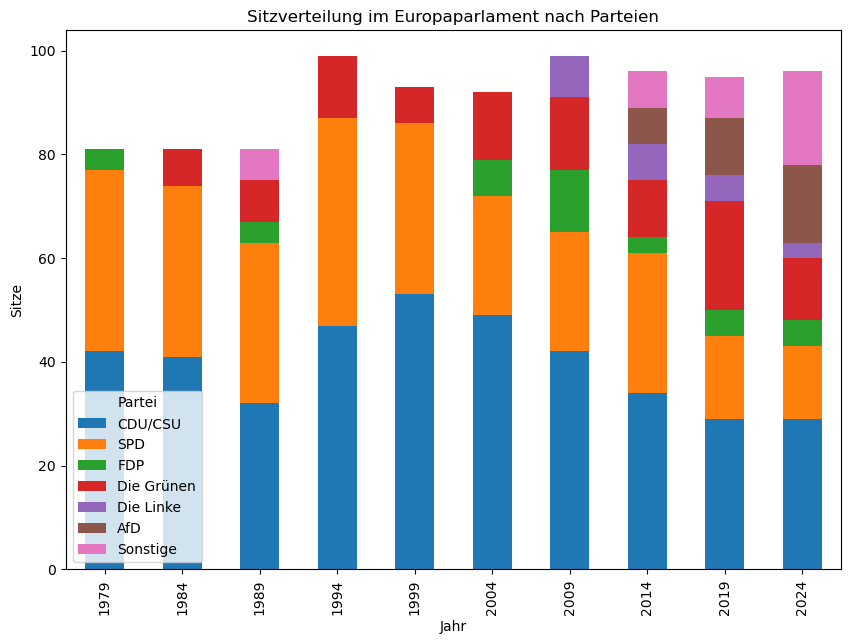

In [41]:
df_final_main_parties.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Sitzverteilung im Europaparlament nach Parteien')
plt.xlabel('Jahr')
plt.ylabel('Sitze')
plt.legend(title='Partei')

plt.show()

In [42]:
df_long = df_final_main_parties_percentage.reset_index().melt(id_vars='Jahr')
df_long.columns = ['Jahr', 'Partei', 'Anteil der Stimmen (%)']
partei_farben = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Die Grünen': 'green',
    'Die Linke': 'purple',
    'AfD': 'blue',
    'Sonstige': 'orange'
}

fig = px.bar(df_long, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='Sitzverteilung im Europaparlament nach Parteien', color_discrete_map=partei_farben)

fig.update_layout(xaxis_title='Jahr', yaxis_title='Anteil der Stimmen (%)', legend_title='Partei')


fig.show()

In [43]:
fig = px.line(df_long, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='Entwicklung der EU-Wahlen seit beginn', color_discrete_map=partei_farben)

fig.update_layout(
    legend_title='Partei',
    xaxis_title='Jahr',
    yaxis_title='Anteil der Stimmen (%)',
    xaxis=dict(
        dtick=5,  
        tick0=1979  
    )
)
fig.write_html("./Stimmverteilung_nach_Partei_alle.html")
fig.show()

In [44]:
partei_farben_cdu = {
    'CDU/CSU': 'grey',
    'SPD': 'gray',
    'FDP': 'gray',
    'Die Grünen': 'gray',
    'Die Linke': 'gray',
    'AfD': 'magenta',
    'Sonstige': 'gray'
}
fig = px.line(df_long, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='Sitzverteilung im Europaparlament nach Parteien', color_discrete_map=partei_farben_cdu)

fig.update_layout(
    legend_title='Partei',
    xaxis_title='Jahr',
    yaxis_title='Sitze',
    xaxis=dict(
        dtick=5,
        tick0=1979  
    )
)
fig.show()

In [45]:
fig = px.line(df_long, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='Sitzverteilung im Europaparlament nach Parteien', color_discrete_map=partei_farben)

fig.update_layout(
    legend_title='Partei',
    xaxis_title='Jahr',
    yaxis_title='Anteil der Stimmen (%)',
    xaxis=dict(
        dtick=5,
        tick0=1979 
    )
)
fig.show()

In [46]:
filtered_df = df_long[(df_long['Partei'].isin(['Die Grünen', 'AfD'])) & (df_long['Jahr'] >= 2014)]

fig = px.line(filtered_df, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='<span style="color:green;">Die Grünen</span> und <span style="color:blue;">AfD</span> seit 2014', markers=True, color_discrete_map=partei_farben)

fig.update_layout(
    xaxis_title='Jahr',
    yaxis_title='Anteil der Stimmen (%)', 
    legend_title='Partei',
    xaxis=dict( 
        dtick=5,
        tick0=2014
    ),
    showlegend=False  
)


fig.show()

In [47]:
filtered_df = df_long[(df_long['Partei'].isin(['CDU/CSU', 'SPD', 'Die Grünen', 'AfD']))]

fig = px.line(filtered_df, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='<span style="color:black;">CDU/CSU</span>, <span style="color:red;">SPD</span>, <span style="color:green;">Die Grünen</span> und <span style="color:blue;">AfD</span>', markers=True, color_discrete_map=partei_farben)

fig.update_layout(
    xaxis_title='Jahr',
    yaxis_title='Anteil der Stimmen (%)', 
    legend_title='Partei',
    xaxis=dict( 
        dtick=5,
        tick0=2014
    ),
    showlegend=False 
)
fig.write_html("Stimmverteilung_nach_Partei_main.html")
fig.show()

In [48]:
filtered_df = df_long[(df_long['Partei'].isin(['CDU/CSU', 'SPD']))]

fig = px.line(filtered_df, x='Jahr', y='Anteil der Stimmen (%)', color='Partei', title='<span style="color:black;">CDU/CSU</span> und <span style="color:red;">SPD</span> seit beginn der Wahlen', markers=True, color_discrete_map=partei_farben)

fig.update_layout(
    legend_title='Partei',
    xaxis_title='Jahr',
    yaxis_title='Anteil der Stimmen (%)',
    xaxis=dict(
        dtick=5, 
        tick0=1979 
    ),
    showlegend=False
)

fig.write_html("./CDUvsSPD_seit_beginn.html")
fig.show()

In [49]:
sitzverteilung_2019 = eu_wahlen[2019].groupby('Fraktionskürzel')['Sitze'].sum().reset_index()
fig = px.pie(sitzverteilung_2019, values='Sitze', names='Fraktionskürzel', title='Sitzverteilung nach Fraktionen im Jahr 2019')

fig.show()

In [50]:
eu_wahlen[2019]['Jahr'] = 2019
eu_wahlen[2024]['Jahr'] = 2024

combined_df = pd.concat([eu_wahlen[2019], eu_wahlen[2024]])

fig = px.bar(combined_df, x='Partei', y='Sitze', color='Jahr', barmode='group',
             title='Wahlergebnisse der Parteien 2019 vs. 2024', labels={'Sitze': 'Anzahl der Sitze', 'Partei': 'Partei'})
fig.update_layout(xaxis_title='Partei', yaxis_title='Anzahl der Sitze', legend_title='Jahr')

fig.show()

In [51]:
fig = px.line(combined_df, x='Jahr', y='Sitze', color='Partei', 
              title='Wahlergebnisse der Parteien 2019 vs. 2024', 
              labels={'Sitze': 'Anzahl der Sitze', 'Partei': 'Partei'}, 
              markers=True)

fig.update_layout(xaxis_title='Jahr', yaxis_title='Anzahl der Sitze', legend_title='Partei')

fig.show()